In [ ]:
%reset

In [43]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/dpeleg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dpeleg/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dpeleg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dpeleg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# import pandas as pd
# import numpy as np
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
#
# # Load the fake news corpus dataset
# root_dir = "/Users/dpeleg/local/nltk_data/fake-news"
# file_name = "FakeNewsNet.csv"
# df = pd.read_csv(f"{root_dir}/{file_name}")


In [8]:

# # Initialize the lemmatizer
# lemmatizer = WordNetLemmatizer()
#
# # Define a function to preprocess the text data
# def preprocess_text(text):
#     # Tokenize the text
#     tokens = word_tokenize(text)
#
#     # Remove stopwords
#     stop_words = set(stopwords.words('english'))
#     tokens = [token for token in tokens if token.lower() not in stop_words]
#
#     # Lemmatize the tokens
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]
#
#     # Join the tokens back into a string
#     text = ' '.join(tokens)
#
#     return text



In [46]:
# # Apply the preprocessing function to the text data
# df['text'] = df['text'].apply(preprocess_text)
#
# # Save the preprocessed data to a new CSV file
# df.to_csv('preprocessed_fake_news_corpus.csv', index=False)

In [35]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

tokenizer = word_tokenize('hello world', language='english')

# Load the LIAR dataset
root_dir = "/Users/dpeleg/local/fake_dataset/liar"
file_name = "train2.tsv"

# Define the column names
column_names = ['rec_id', 'id', 'label', 'statement', 'subject', 'speaker', 'job title', 'state', 'party', 'true', 'false', 'half', 'mostly', 'pants-fire', 'context', 'justification']

df = pd.read_csv(f"{root_dir}/{file_name}", delimiter='\t', names=column_names)
# df = pd.read_csv('liar_train.csv')

# Describe the dataset
# print(df.describe())
# Print the top 3 lines of the dataset
print(df.columns)
print(df.head(1))




Index(['rec_id', 'id', 'label', 'statement', 'subject', 'speaker', 'job title',
       'state', 'party', 'true', 'false', 'half', 'mostly', 'pants-fire',
       'context', 'justification'],
      dtype='object')
   rec_id         id  label  \
0     0.0  2635.json  false   

                                           statement   subject       speaker  \
0  Says the Annies List political group supports ...  abortion  dwayne-bohac   

              job title  state       party  true  false  half  mostly  \
0  State representative  Texas  republican   0.0    1.0   0.0     0.0   

   pants-fire   context                                      justification  
0         0.0  a mailer  That's a premise that he fails to back up. Ann...  


In [36]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
#
# # Define a function to preprocess the text data
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        # Tokenize the text
        tokens = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.lower() not in stop_words]

        # Lemmatize the tokens
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Join the tokens back into a string
        text = ' '.join(tokens)

        return text
    else:
        return ''  # Return an empty string for non-string inputs
#

In [37]:
# import nltk
# nltk.data.path.append('/Users/dpeleg/local/nltk_data/tokenizers')

# Apply the preprocessing function to the statement column
df['statement'] = df['statement'].apply(preprocess_text)

# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_liar_train.csv', index=False)

# BERT Embedding

In [38]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel

In [47]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [50]:
def generate_bert_embeddings(texts):
    # Create a list to store the embeddings
    embeddings = []

    print(f'Generating BERT embeddings using tokenizer: {tokenizer.__class__.__name__}')

    i = 0
    # Iterate over the input texts
    for text in texts:
        i += 1
        if i % 1000 == 0:
            print(f"Completed {i} loops in function")
        # Tokenize the text using the BERT tokenizer
        inputs = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=512,
            return_attention_mask=True,
            return_tensors='pt'
        )

        # Get the input IDs and attention mask
        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']

        # Zero the gradients
        model.zero_grad()

        # Forward pass through the BERT model
        outputs = model(input_ids, attention_mask=attention_mask)

        # Get the last hidden state (i.e., the embedding)
        embedding = outputs.last_hidden_state[:, 0, :]

        # Append the embedding to the list
        embeddings.append(embedding.detach().numpy())

    print(f"Completed {i} loops in function")
    # Return the list of embeddings
    return embeddings

In [51]:
import numpy as np

# Load the fake news dataset
df = pd.read_csv('preprocessed_liar_train.csv')

# Extract the article texts
statement = df['statement'].fillna('')

# Generate BERT embeddings for the article texts
embeddings = generate_bert_embeddings(statement)

# Convert the embeddings to a numpy array
embeddings_array = np.array(embeddings)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Generating BERT embeddings using tokenizer: BertTokenizer
Completed 1000 loops in function
Completed 2000 loops in function
Completed 3000 loops in function
Completed 4000 loops in function
Completed 5000 loops in function
Completed 6000 loops in function
Completed 7000 loops in function
Completed 8000 loops in function
Completed 9000 loops in function
Completed 10000 loops in function
Completed 10242 loops in function


# TSNE

In [57]:
from sklearn.manifold import TSNE

# Remove dimension
embeddings_array = embeddings_array.squeeze()

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_array)

# Alternatively, you can also reduce dimensionality to 3D
# tsne = TSNE(n_components=3, random_state=42)
# embeddings_3d = tsne.fit_transform(embeddings_array)

/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T

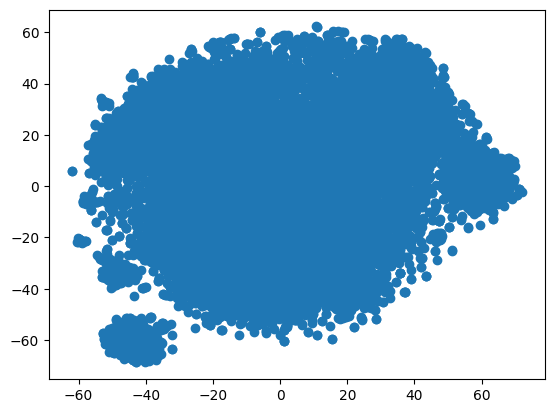

In [59]:
import matplotlib.pyplot as plt

# Visualize the 2D clusters
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.show()

# Alternatively, you can visualize the 3D clusters
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2])
# plt.show()

In [60]:
from sklearn.manifold import TSNE

# 3D PLOT

# Remove dimension
# embeddings_array = embeddings_array.squeeze()

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings_array)

# Alternatively, you can also reduce dimensionality to 3D
# tsne = TSNE(n_components=3, random_state=42)
# embeddings_3d = tsne.fit_transform(embeddings_array)

/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T

/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: divide by zero encountered in dot
  vecw = np.dot(M, vec.data)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: overflow encountered in dot
  vecw = np.dot(M, vec.data)
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/mpl_toolkits/mplot3d/proj3d.py:148: RuntimeWarning: invalid value encountered in dot
  vecw = np.dot(M, vec.data)


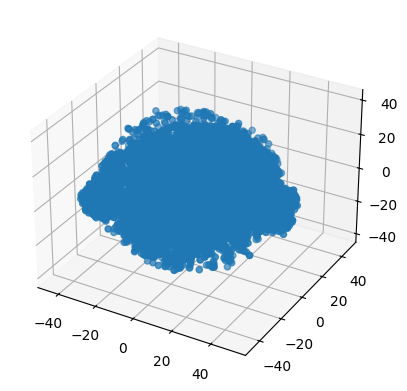

In [61]:
import matplotlib.pyplot as plt

# Visualize the 2D clusters
# plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
# plt.show()

# Alternatively, you can visualize the 3D clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2])
plt.show()

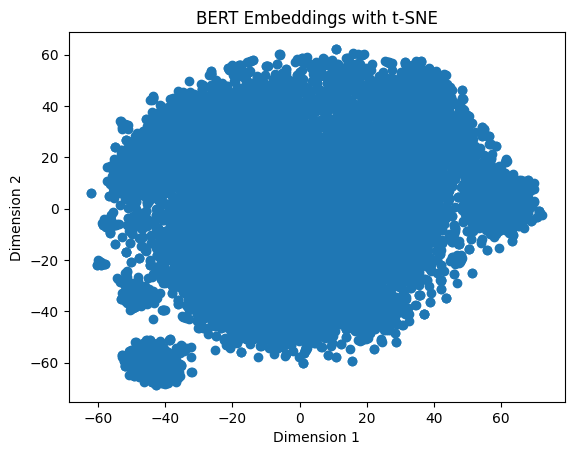

In [62]:
import matplotlib.pyplot as plt

# Visualize the 2D clusters
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title("BERT Embeddings with t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [63]:
from sklearn.metrics import silhouette_score

labels = df['label'].fillna('')
# Calculate the silhouette score for each sample
silhouette = silhouette_score(embeddings_2d, labels)

# Print the average silhouette score
print("Average silhouette score:", silhouette.mean())

/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/dpeleg/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Average silhouette score: -0.10715929
